# Example-02 clustering samples in a polar coordinate

Author: https://github.com/ludlows

Please install wgmm before using this notebook by the command below:
```bash
pip install https://github.com/ludlows/wgmm/archive/refs/heads/main.zip
```
in this notebook, we will use the wrapped Gaussian mixture model to cluster samples in a polar coordinate.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from wgmm import WGMixModel
from numpy.random import default_rng

## synthesize samples

In [2]:
rng = default_rng(123321)

In [3]:
n_sample = 500 # number of samples
means_angle = [355, 100] # unit : degree 
variances_angle = [50, 60] #  variances
split = [0.7, 0.3] #  the weight of each components

In [4]:
means_radius = [0.4, 0.7]
variances_radius = [0.01, 0.01]


In [5]:
angles1 = means_angle[0] + variances_angle[0] **0.5  * rng.standard_normal(int(split[0] * n_sample))

In [6]:
angles1.min(), angles1.max()

(337.2641988829006, 375.0618383117922)

In [7]:
radius1 = means_radius[0] + variances_radius[0] **0.5  * rng.standard_normal(int(split[0] * n_sample))

In [8]:
radius1.min(), radius1.max()

(0.07460469040996676, 0.7548339203315346)

In [9]:
angles2 = means_angle[1] + variances_angle[1] **0.5  * rng.standard_normal(int(split[1] * n_sample))

In [10]:
angles2.min(),angles2.max()

(72.1650294811, 118.40382800357722)

In [11]:
radius2 = means_radius[1] + variances_radius[1] **0.5  * rng.standard_normal(int(split[1] * n_sample))

In [12]:
radius2.min(),radius2.max()

(0.40656354850218995, 1.0098561756522901)

In [13]:
angles = np.vstack([angles1[:,np.newaxis],angles2[:,np.newaxis]])

In [14]:
radius = np.vstack([radius1[:,np.newaxis],radius2[:,np.newaxis]])

In [15]:
samples  = np.hstack([angles,radius])

In [16]:
samples.shape

(500, 2)

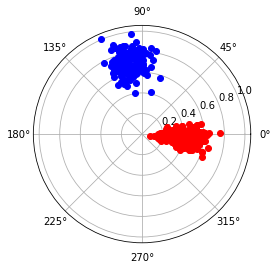

In [17]:
plt.polar(angles1/180*np.pi, radius1, 'r.', markersize=12)
plt.polar(angles2/180*np.pi, radius2, 'b.', markersize=12)

## use WGMM
here we are using `wgmm` to model the probabilistic distribution of the synthesized samples.

In [18]:
samples_wgmm = samples.copy()

In [19]:
samples_wgmm[:,0] = samples_wgmm[:,0] / 180*np.pi

In [20]:
weights_init = np.array([0.9,0.1])
means_init = np.array([[270.0, 0.5],[180.0, 0.7]]) #/ 180.0 * np.pi
means_init[:,0] = means_init[:,0] / 180.0 * np.pi
covars_init = np.zeros((2,2,2))
covars_init[0,:,:] = np.array([[0.1,0],[0,0.1]])
covars_init[1,:,:] = np.array([[0.1,0],[0,0.1]])
periods = np.array([2*np.pi, 3]) # 3 is big enough here since radius is not a circular variale and it ranges from 0 to 1

In [21]:
model = WGMixModel(n_components=2, weights_init=weights_init, means_init=means_init, covars_init=covars_init, periods=periods, 
                   tol=1e-4, reg_covar=1e-6, max_iter=100)

In [22]:
rng.shuffle(samples_wgmm, axis=0)

In [23]:
model.fit(samples_wgmm)

True

In [24]:
means_estimated = model.means_.copy()

In [25]:
means_estimated[:,0] = means_estimated[:,0] / np.pi * 180

In [26]:
means_estimated

array([[355.11574106,   0.39957169],
       [100.05972748,   0.70743917]])

In [27]:
model.means_

array([[6.19793891, 0.39957169],
       [1.74637169, 0.70743917]])

## visualize Predicted Results

In [28]:
labels = model.predict(samples_wgmm)

In [29]:
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [30]:
samples_label_0 = np.array([ samples_wgmm[i,:] for i,v in enumerate(labels) if v == 0])

In [31]:
samples_label_1 = np.array([ samples_wgmm[i,:] for i,v in enumerate(labels) if v == 1])

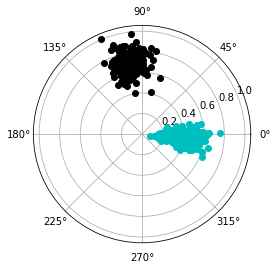

In [32]:
plt.polar(samples_label_0[:,0], samples_label_0[:,1], 'c.', markersize=12)
plt.polar(samples_label_1[:,0], samples_label_1[:,1], 'k.', markersize=12)